In [1]:
!nvidia-smi

Tue Jan 25 16:44:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
import torch
torch.__version__

'1.7.1+cu110'

In [3]:
! [ -e /content ] && pip install -Uqq fastai 

In [4]:
import fastai
fastai.__version__

'2.5.3'

In [5]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [ ]:
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
getdata.kaggle()
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [ ]:
getdata.zipextract('/content/new-plant-diseases-dataset.zip')

In [9]:
files = get_image_files("/content/new plant diseases dataset(augmented)")
len(files)

87867

In [10]:
files[0],files[6]

(Path('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Pepper,_bell___healthy/0e5d9ac1-4de8-491e-ab95-809850866805___JR_HL 8534_new30degFlipLR.JPG'),
 Path('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Pepper,_bell___healthy/0de13a24-e542-45a2-be5a-8db7d8d858db___JR_HL 5982.JPG'))

In [12]:
def label_func(f): return f[0].isupper()

In [13]:
dls = ImageDataLoaders.from_name_func('/content/new plant diseases dataset(augmented)', files, label_func, item_tfms=Resize(224))

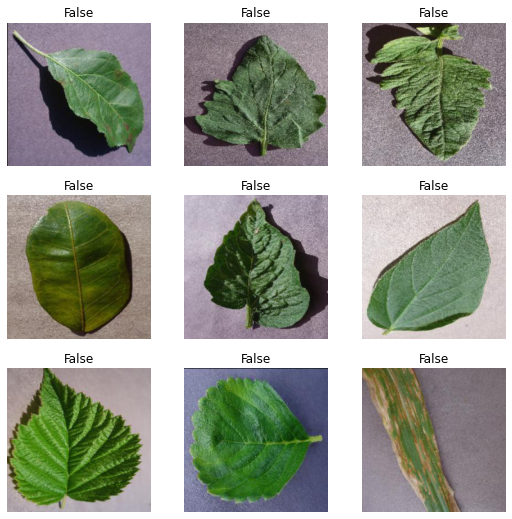

In [14]:
dls.show_batch()

In [15]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [16]:
learn.predict(files[0])

('True', tensor(1), tensor([1.6765e-04, 9.9983e-01]))

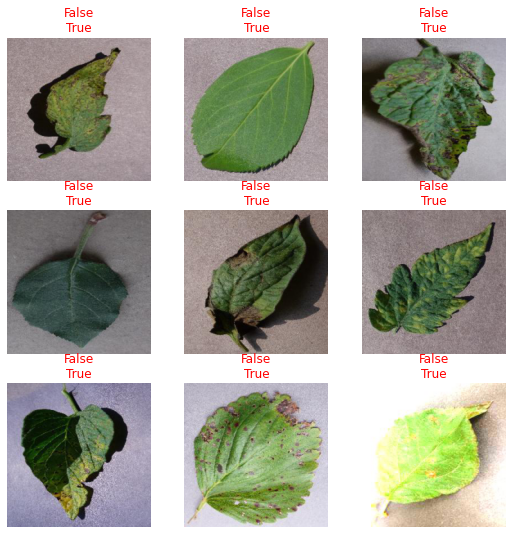

In [17]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(k=15)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.lr_find()

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
learn.save('./my_model.pkl')

In [ ]:
learn.export("model")